In [11]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached frozendict-2.4.6-py313-none-any.whl.metadata (23 kB)
  Using cached peewee-3.18.2.tar.gz (949 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   --------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [19]:
import yfinance as yf

# Download data
df = yf.download('AAPL', start='2010-01-01', end='2019-12-31')

# Reset index and view
df = df.reset_index()
df.head()


C:\Users\EWPoo\AppData\Local\Temp\ipykernel_39044\1919711001.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2010-01-01', end='2019-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431896,6.446623,6.382908,6.414465,493729600
1,2010-01-05,6.443015,6.479380,6.409053,6.449627,601904800
2,2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
3,2010-01-07,6.328809,6.371487,6.282827,6.363973,477131200
4,2010-01-08,6.370885,6.371487,6.283128,6.320394,447610800


In [20]:
df=df.drop(['Date'],axis=1)
df.head

C:\Users\EWPoo\AppData\Local\Temp\ipykernel_39044\385295399.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df=df.drop(['Date'],axis=1)


<bound method NDFrame.head of Price       Close       High        Low       Open     Volume
Ticker       AAPL       AAPL       AAPL       AAPL       AAPL
0        6.431896   6.446623   6.382908   6.414465  493729600
1        6.443015   6.479380   6.409053   6.449627  601904800
2        6.340532   6.468563   6.333920   6.443017  552160000
3        6.328809   6.371487   6.282827   6.363973  477131200
4        6.370885   6.371487   6.283128   6.320394  447610800
...           ...        ...        ...        ...        ...
2510    68.667610  68.728057  67.789921  67.828608   98572000
2511    68.732887  68.882802  68.406480  68.834441   48478800
2512    70.096573  70.113500  68.836863  68.865876   93121200
2513    70.069969  71.078226  69.663768  70.389130  146266000
2514    70.485840  70.768734  68.962583  69.987759  144114400

[2515 rows x 5 columns]>

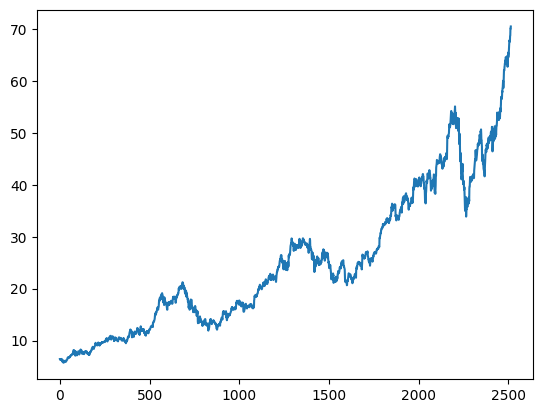

In [21]:
plt.plot(df.Close)

In [22]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.137911
2511,57.335283
2512,57.571941
2513,57.799542


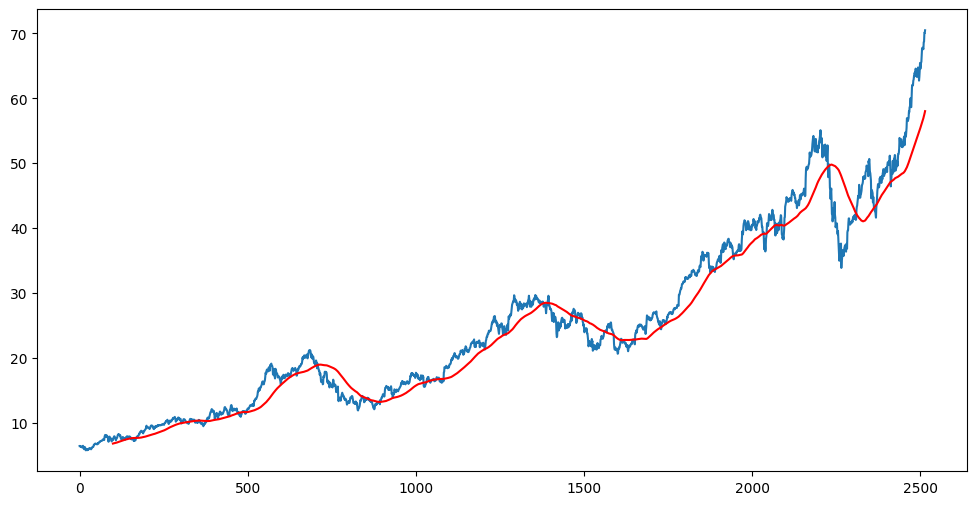

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [24]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.096149
2511,52.223418
2512,52.356549
2513,52.487130


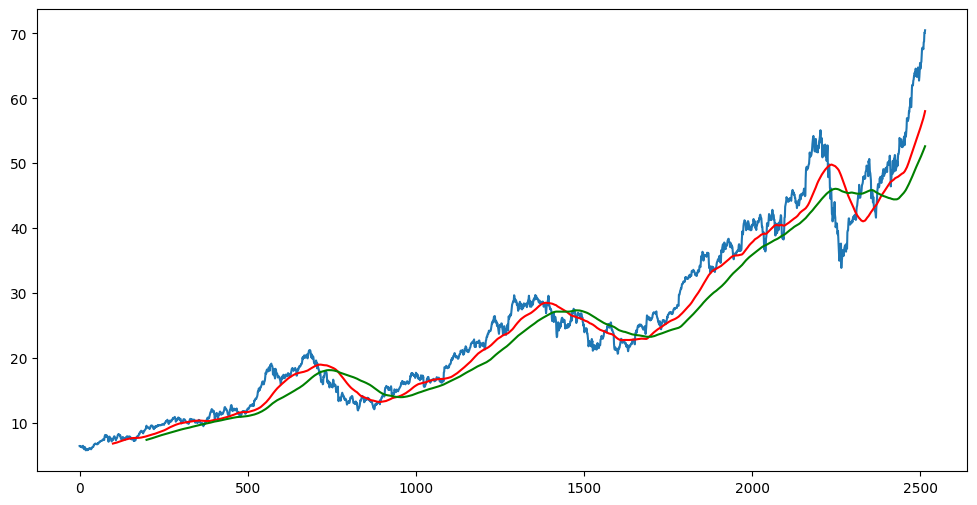

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [26]:
df.shape

(2515, 5)

In [27]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [30]:
data_training.head()

Ticker,AAPL
0,6.431896
1,6.443015
2,6.340532
3,6.328809
4,6.370885


In [31]:
data_testing.head()

Ticker,AAPL
1760,26.961212
1761,26.751020
1762,26.827244
1763,26.797218
1764,26.933496


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.0276    ],
       [0.02806496],
       [0.02377926],
       ...,
       [0.88408407],
       [0.89123188],
       [0.88640199]], shape=(1760, 1))

In [38]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)

In [43]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

C:\Users\EWPoo\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\EWPoo\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\EWPoo\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

In [45]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

C:\Users\EWPoo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 24s 264ms/step - loss: 0.1448
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - loss: 0.0152
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 262ms/step - loss: 0.0118
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 282ms/step - loss: 0.0094
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 261ms/step - loss: 0.0110
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 272ms/step - loss: 0.0089
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 288ms/step - loss: 0.0096
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 295ms/step - loss: 0.0089
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 294ms/step - loss: 0.0078
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 293ms/step - loss: 0.0082
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - loss: 0.0081
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 282ms/step - loss: 0.0079
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - loss: 0.0068
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - loss: 0.0068
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [48]:
model.save('keras_model.h5')

In [49]:
data_testing.head()

Ticker,AAPL
1760,26.961212
1761,26.751020
1762,26.827244
1763,26.797218
1764,26.933496


In [52]:
past_100_days=data_training.tail(100)

In [54]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [55]:
final_df.head()

Ticker,AAPL
0,24.902443
1,25.003550
2,24.817417
3,24.801331
4,24.858784


In [56]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02573582],
       [0.02789679],
       [0.02391854],
       [0.02357472],
       [0.02480268],
       [0.0311874 ],
       [0.03069613],
       [0.02991036],
       [0.02922275],
       [0.030598  ],
       [0.02642334],
       [0.02809316],
       [0.02406587],
       [0.02180649],
       [0.01871254],
       [0.01812306],
       [0.01409581],
       [0.01458692],
       [0.01768111],
       [0.02259254],
       [0.02244517],
       [0.0256867 ],
       [0.01173834],
       [0.        ],
       [0.01134548],
       [0.02367293],
       [0.04243438],
       [0.06109743],
       [0.05790523],
       [0.05132398],
       [0.05127482],
       [0.05117657],
       [0.05643174],
       [0.04705099],
       [0.04788592],
       [0.04891743],
       [0.05314126],
       [0.04444823],
       [0.0487209 ],
       [0.04611798],
       [0.04847532],
       [0.0487209 ],
       [0.05284644],
       [0.05368141],
       [0.06345506],
       [0.06468302],
       [0.06979074],
       [0.068

In [57]:
input_data.shape

(855, 1)

In [58]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [60]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step


In [61]:
y_predicted.shape

(755, 1)

In [62]:
y_test

array([0.06973836, 0.06524588, 0.06687502, 0.06623328, 0.06914598,
       0.07556344, 0.080895  , 0.08148733, 0.08464676, 0.08217853,
       0.08114192, 0.08588095, 0.08583158, 0.08479494, 0.08588095,
       0.08627581, 0.08573285, 0.0951617 , 0.09545795, 0.09550724,
       0.09392755, 0.09254529, 0.12907611, 0.12799002, 0.13070521,
       0.1366784 , 0.14279973, 0.14531749, 0.15002774, 0.14854005,
       0.15434112, 0.16291825, 0.16534787, 0.16455436, 0.16638888,
       0.17124788, 0.17328061, 0.17040488, 0.17104956, 0.17238815,
       0.17268542, 0.18656798, 0.18245255, 0.18651808, 0.18433685,
       0.18522938, 0.18265116, 0.18106446, 0.18334541, 0.18364268,
       0.18260159, 0.1898901 , 0.19103   , 0.18755958, 0.19484792,
       0.18681584, 0.19464947, 0.19217064, 0.19078214, 0.19197219,
       0.20644933, 0.20803586, 0.207094  , 0.2057554 , 0.20595353,
       0.21125884, 0.20754039, 0.2057554 , 0.2041687 , 0.20332598,
       0.19569064, 0.19653344, 0.19281507, 0.19668232, 0.19355

In [63]:
y_predicted

array([[0.12787555],
       [0.12874912],
       [0.12958638],
       [0.13036549],
       [0.13107263],
       [0.13170147],
       [0.13226207],
       [0.13278006],
       [0.13327967],
       [0.13377777],
       [0.13429287],
       [0.13482903],
       [0.13538818],
       [0.13597327],
       [0.13658082],
       [0.13717328],
       [0.13775162],
       [0.13831502],
       [0.13886896],
       [0.13942783],
       [0.1400008 ],
       [0.14059055],
       [0.14119208],
       [0.1418356 ],
       [0.14258313],
       [0.14347948],
       [0.14456083],
       [0.1458572 ],
       [0.14738888],
       [0.14911568],
       [0.15098178],
       [0.15301448],
       [0.15518919],
       [0.15743497],
       [0.15978122],
       [0.16224638],
       [0.16484207],
       [0.1675742 ],
       [0.17043622],
       [0.17340845],
       [0.17646202],
       [0.17952253],
       [0.18256986],
       [0.18559253],
       [0.18857397],
       [0.19149268],
       [0.19432494],
       [0.197

In [64]:
scaler.scale_

array([0.02137322])

In [65]:
scale_factor=1/0.02137322
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

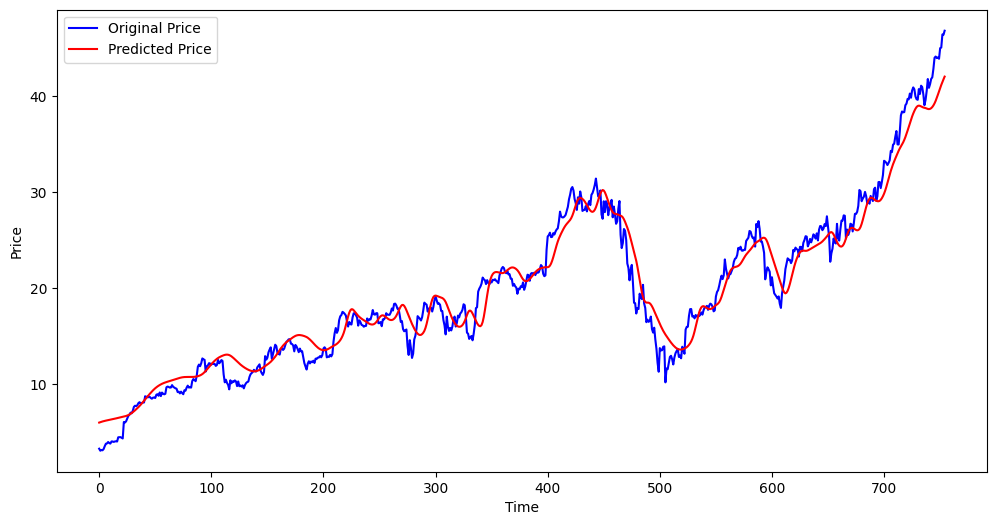

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
